In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load datasets
customers_path = 'data/Customers.csv'
products_path = 'data/Products.csv'
transactions_path = 'data/Transactions.csv'

In [47]:
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)


In [48]:
#UNDERSTAND THE DATA

In [49]:
def explore_data(df, name):
    print('-'*120)
    print(f"\n--- Dataset: {name} ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Info:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nSample Data:")
    print(df.head())
    print('-'*120)


In [50]:


explore_data(customers, "Customers")
explore_data(products, "Products")
explore_data(transactions, "Transactions")


------------------------------------------------------------------------------------------------------------------------

--- Dataset: Customers ---
Shape: (200, 4)
Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Sample Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C

In [51]:
# DATA CLEANING

In [52]:
def clean_data(df):
    # Handle missing values (example: filling missing with placeholders or dropping rows)
    df = df.drop_duplicates() # inorder to avoid redundant values
    
    # df = df.dropna() # drop the tuples with null values
    
    df = df.fillna('Unknown')  # Replace with some mean , median or mode value if data loss is not acceptable
    return df

In [53]:
import numpy as np

# products.replace([np.inf, -np.inf], np.nan, inplace=True)

In [54]:
products['Price'].fillna(products['Price'].mean(), inplace=True)
# products['Category'].fillna('Unknown', inplace=True)

In [55]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [69]:
print(products.isnull().sum())
products = products.dropna()
print(products.describe(include='all'))

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [70]:
customers_cleaned = clean_data(customers)
products_cleaned = clean_data(products)
transactions_cleaned = clean_data(transactions)

In [71]:
explore_data(customers_cleaned, "Customers Cleaned")
explore_data(products_cleaned, "Products Cleaned")
explore_data(transactions_cleaned, "Transactions Cleaned")

------------------------------------------------------------------------------------------------------------------------

--- Dataset: Customers Cleaned ---
Shape: (200, 4)
Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB
None

Missing values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Sample Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07


In [72]:
#EXPLORATORY DATA ANALYSIS (EDA)


--- Customers Analysis ---
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


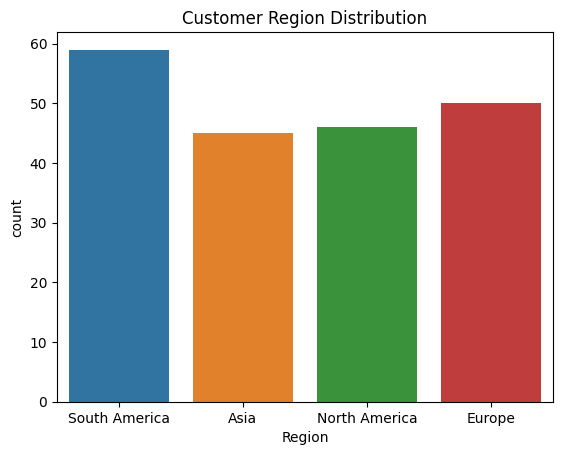

In [73]:
#CUSTOMER ANALYSIS
print("\n--- Customers Analysis ---")
print(customers_cleaned.describe(include='all'))
sns.countplot(x='Region', data=customers_cleaned)
plt.title('Customer Region Distribution')
plt.show()

In [74]:
#SIGNUP TRENDS
customers_cleaned['SignupDate'] = pd.to_datetime(customers_cleaned['SignupDate'], errors='coerce')

In [75]:
customers_cleaned = customers_cleaned.dropna(subset=['SignupDate'])

In [76]:
customers_cleaned['SignupYearMonth'] = customers_cleaned['SignupDate'].dt.to_period('M')

In [77]:
signup_trends = customers_cleaned.groupby('SignupYearMonth').size().reset_index(name='Signups')

In [78]:
signup_trends['SignupYearMonth'] = signup_trends['SignupYearMonth'].dt.to_timestamp()

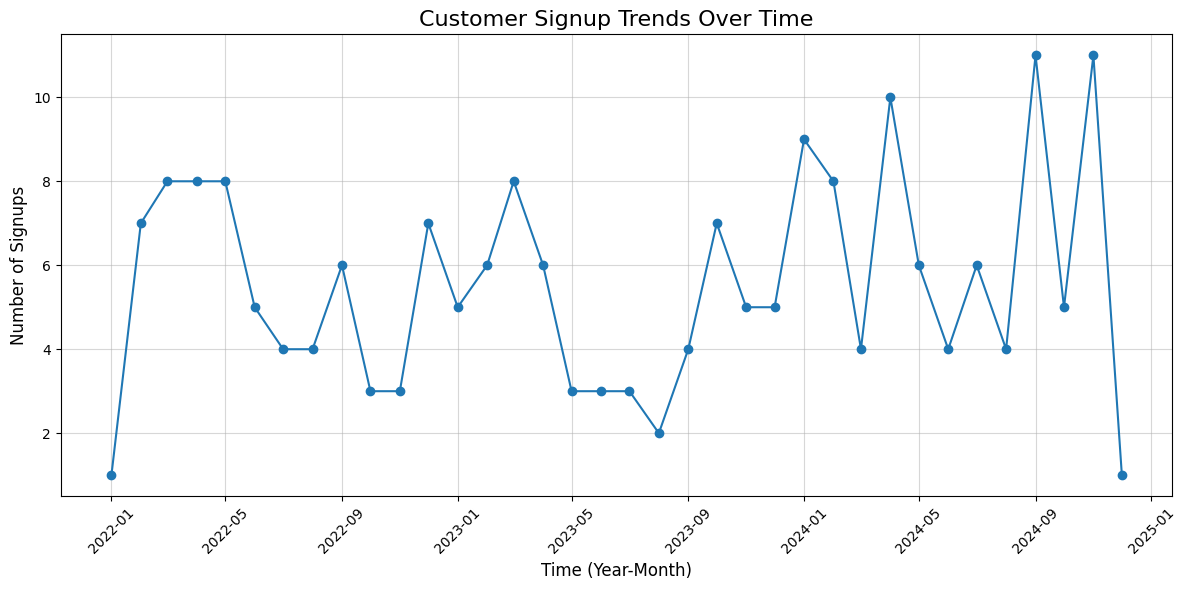

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(signup_trends['SignupYearMonth'], signup_trends['Signups'], marker='o', linestyle='-')
plt.title('Customer Signup Trends Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


--- Products Analysis ---
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


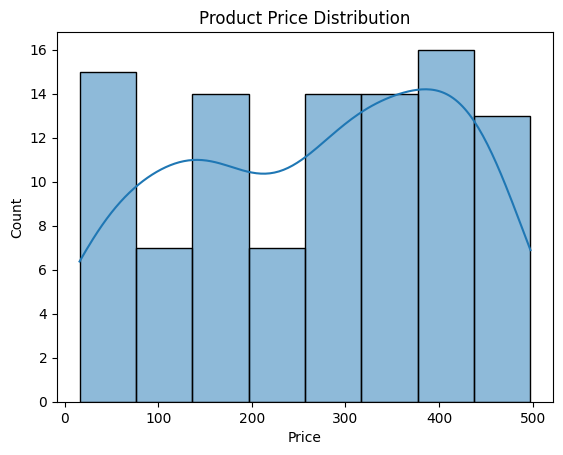

In [80]:
#PRODUCT ANALYSIS
print("\n--- Products Analysis ---")
print(products_cleaned.describe(include='all'))
sns.histplot(products_cleaned['Price'], kde=True)
plt.title('Product Price Distribution')
plt.show()


In [81]:
merged_data = transactions_cleaned.merge(products_cleaned, on='ProductID', how='left')

In [82]:
category_analysis = merged_data.groupby('Category').agg(
    TotalTransactions=('TransactionID', 'count'),
    TotalRevenue=('TotalValue', 'sum')
).reset_index()


In [83]:
category_analysis = category_analysis.sort_values(by='TotalTransactions', ascending=False)

In [84]:
print(category_analysis)

      Category  TotalTransactions  TotalRevenue
0        Books                270     192147.47
2  Electronics                254     180783.50
3   Home Decor                248     150893.93
1     Clothing                228     166170.66


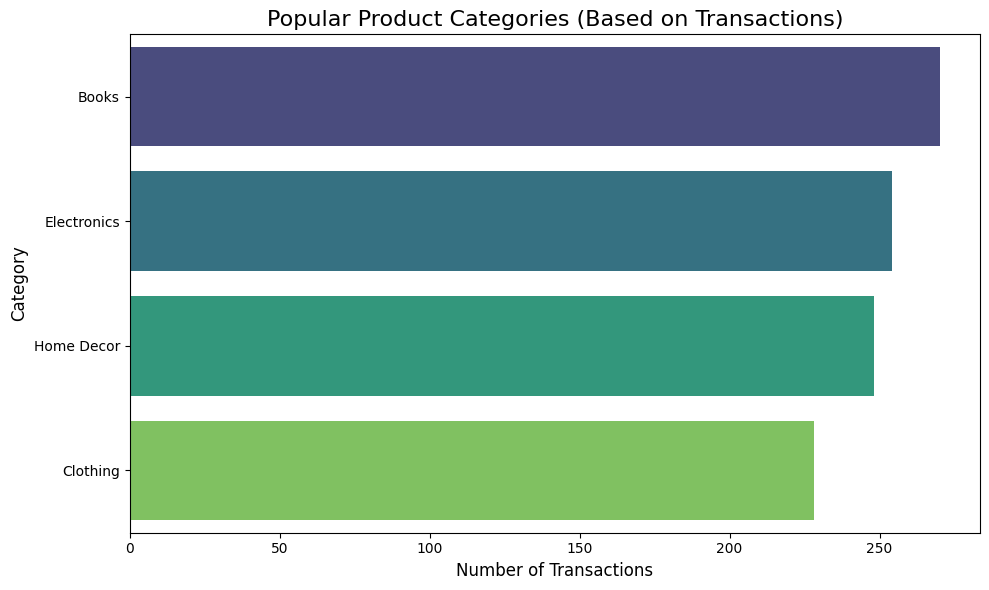

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalTransactions', y='Category', data=category_analysis, palette='viridis')
plt.title('Popular Product Categories (Based on Transactions)', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

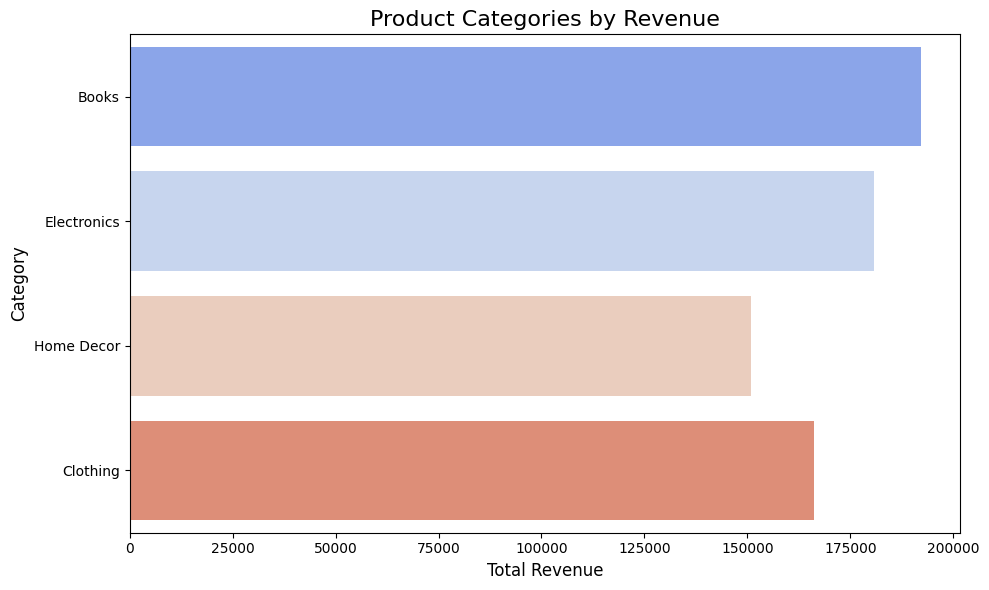

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalRevenue', y='Category', data=category_analysis, palette='coolwarm')
plt.title('Product Categories by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

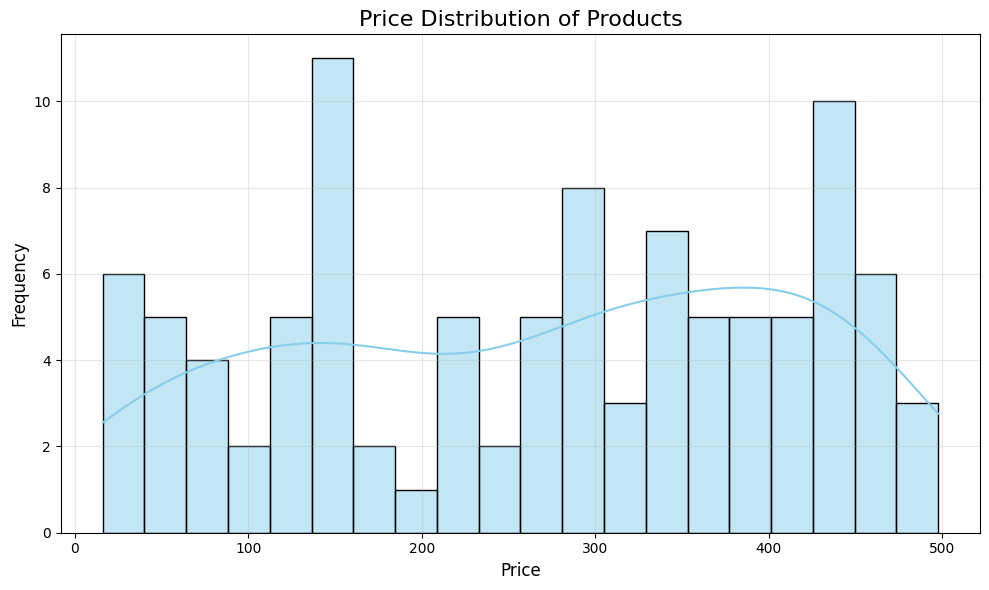

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(products_cleaned['Price'], kde=True, bins=20, color='skyblue')
plt.title('Price Distribution of Products', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

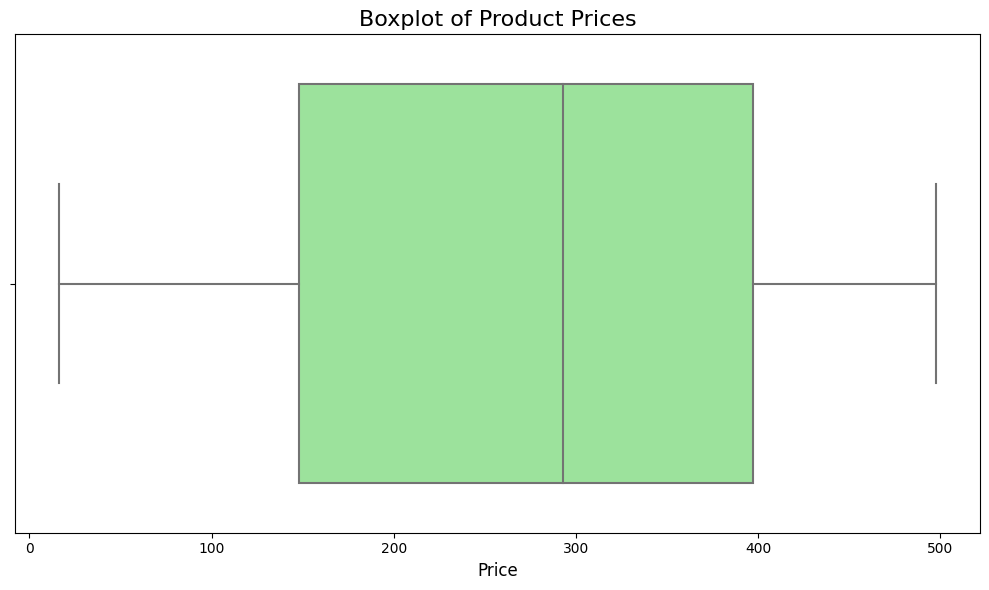

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=products_cleaned['Price'], color='lightgreen')
plt.title('Boxplot of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.tight_layout()
plt.show()

In [89]:
print(products_cleaned['Price'].describe())

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [90]:
transactions_cleaned.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68



--- Transactions Analysis ---
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1          NaN   
mean             NaN        NaN       NaN                  NaN     2.537000   
std              NaN        NaN       NaN                  NaN     1.117981   
min              NaN        NaN       NaN                  NaN     1.000000   
25%              NaN        NaN       NaN                  NaN     2.000000   
50%              NaN        NaN       NaN                  NaN     3.000000   
75%              NaN        NaN       NaN                  NaN     4.000000   
max              NaN        NaN       NaN                  NaN     4.000000   

         TotalValue 

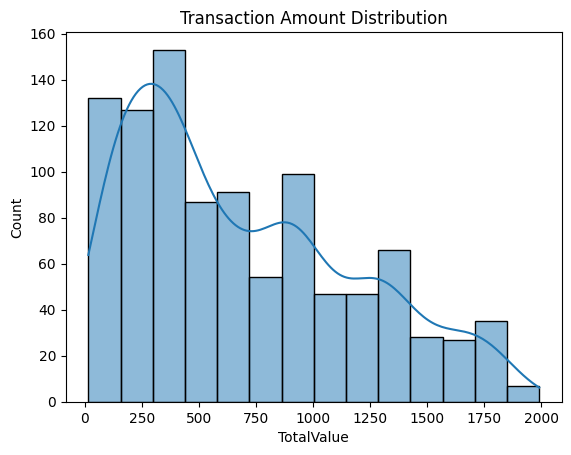

In [91]:
#Transactions Analysis
print("\n--- Transactions Analysis ---")
print(transactions_cleaned.describe(include='all'))
sns.histplot(transactions_cleaned['TotalValue'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

In [92]:
#Merging Datasets for Insights
merged_data = transactions_cleaned.merge(customers_cleaned, on='CustomerID', how='left')
merged_data = merged_data.merge(products_cleaned, on='ProductID', how='left')
print("\n--- Merged Data ---")
print(merged_data.head())


--- Merged Data ---
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

  SignupYearMonth                      ProductName     Category  Price_y  
0         2022-12  ComfortLiving Bluetooth Speaker  Electronic

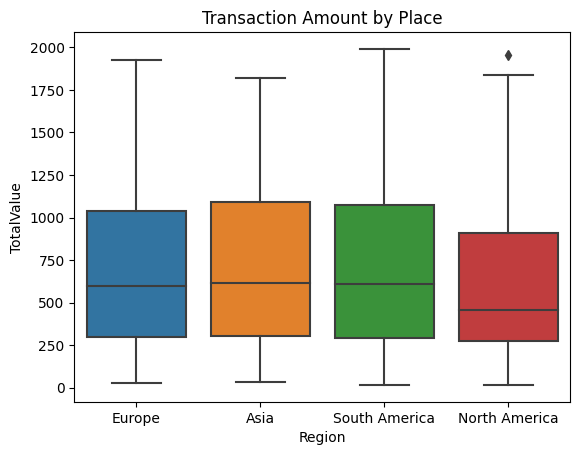

In [93]:

sns.boxplot(x='Region', y='TotalValue', data=merged_data)
plt.title('Transaction Amount by Place')
plt.show()


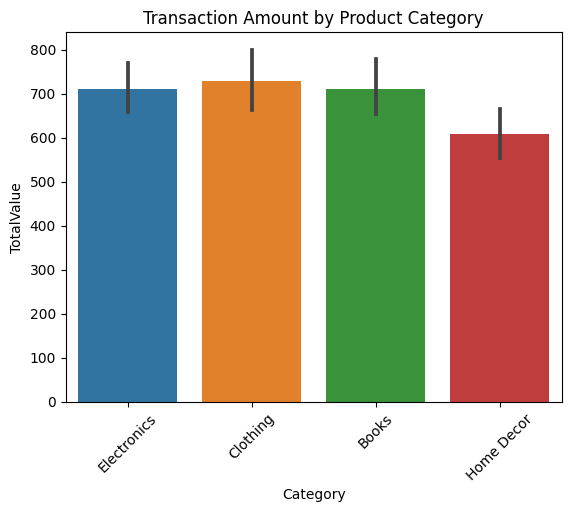

In [94]:
#POPULAR PRODUCT CATEGORIES BASED ON TRANSACTIONS
sns.barplot(x='Category', y='TotalValue', data=merged_data)
plt.title('Transaction Amount by Product Category')
plt.xticks(rotation=45)
plt.show()

In [95]:
transactions_cleaned['TransactionDate'] = pd.to_datetime(transactions_cleaned['TransactionDate'], errors='coerce')

In [96]:
transactions_cleaned = transactions_cleaned.dropna(subset=['TransactionDate'])

In [97]:
daily_trends = transactions_cleaned.groupby(transactions_cleaned['TransactionDate'].dt.date).agg(
    TotalTransactions=('TransactionID', 'count'),
    TotalRevenue=('TotalValue', 'sum')
).reset_index()

In [98]:
daily_trends.rename(columns={'TransactionDate': 'Date'}, inplace=True)


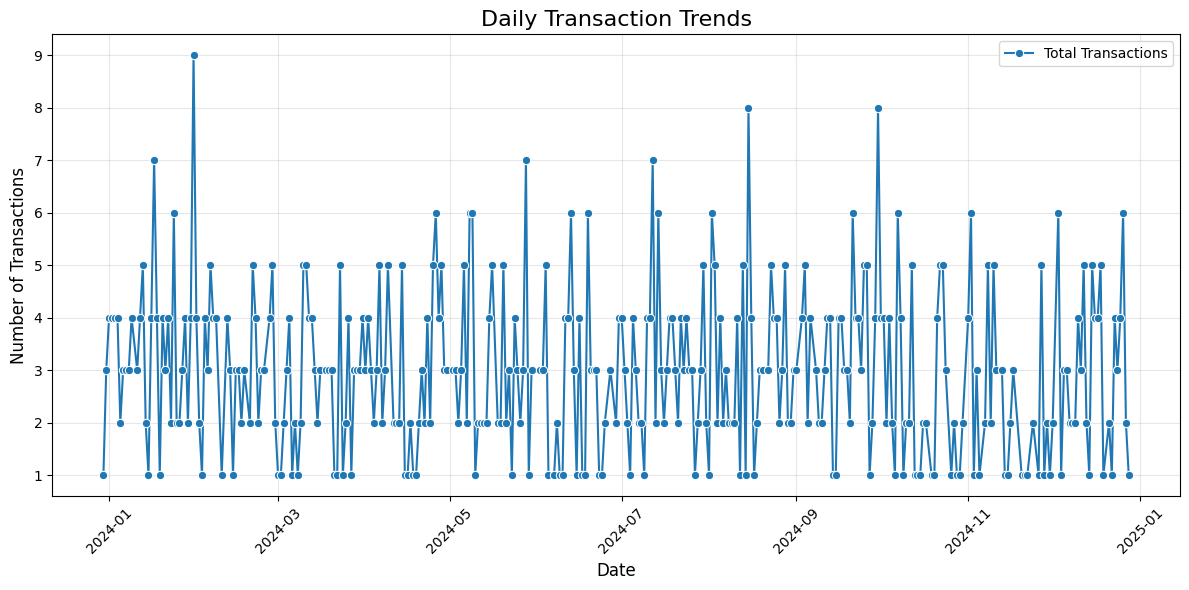

In [99]:
#PRICE DISTRIBUTION OF PRODUCTS
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='TotalTransactions', data=daily_trends, marker='o', label='Total Transactions')
plt.title('Daily Transaction Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
temp = pd.DataFrame(daily_trends)
temp.describe()

,TotalTransactions,TotalRevenue
count,337.000000,337.000000
mean,2.967359,2047.464570
std,1.532040,1395.682527
min,1.000000,41.180000
25%,2.000000,995.520000
50%,3.000000,1809.680000
75%,4.000000,2791.060000
max,9.000000,7585.500000


In [128]:
print(temp[temp["TotalTransactions"]==9])
print(temp[temp["TotalRevenue"]==7585.500000])

          Date  TotalTransactions  TotalRevenue
31  2024-01-31                  9       4902.76
           Date  TotalTransactions  TotalRevenue
233  2024-09-04                  5        7585.5


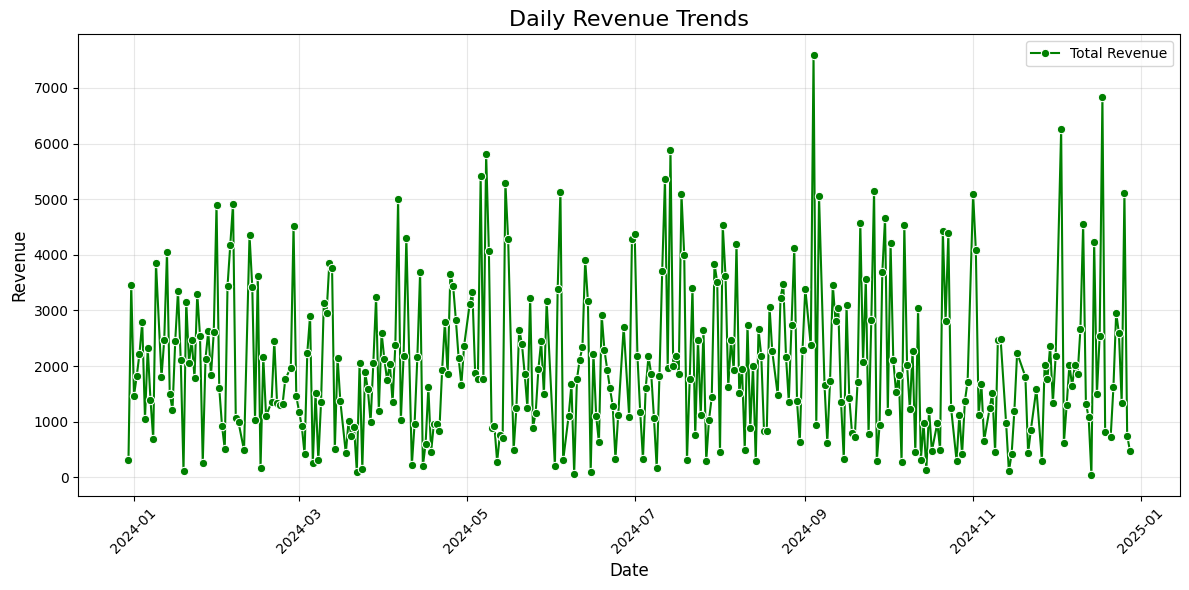

In [100]:
#TRANSACTION TRENDS OVER TIME
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='TotalRevenue', data=daily_trends, marker='o', color='green', label='Total Revenue')
plt.title('Daily Revenue Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [101]:
merged_data = transactions_cleaned.merge(products_cleaned, on='ProductID', how='left')

In [102]:
product_revenue = merged_data.groupby(['ProductID', 'ProductName']).agg(
    TotalRevenue=('TotalValue', 'sum')
).reset_index()

In [103]:
product_revenue = product_revenue.sort_values(by='TotalRevenue', ascending=False)

In [104]:
top_products = product_revenue.head(10)
print(top_products)

   ProductID               ProductName  TotalRevenue
28      P029        TechPro Headphones      19513.80
78      P079            ActiveWear Rug      17946.91
47      P048          TechPro Cookbook      17905.20
19      P020         ActiveWear Jacket      15060.92
61      P062           HomeSense Novel      14592.24
58      P059           SoundWave Jeans      13947.20
38      P039        TechPro Smartwatch      13778.88
82      P083     ActiveWear Smartwatch      13671.60
18      P019     ComfortLiving Sweater      13487.95
40      P041  ComfortLiving Smartphone      13232.12


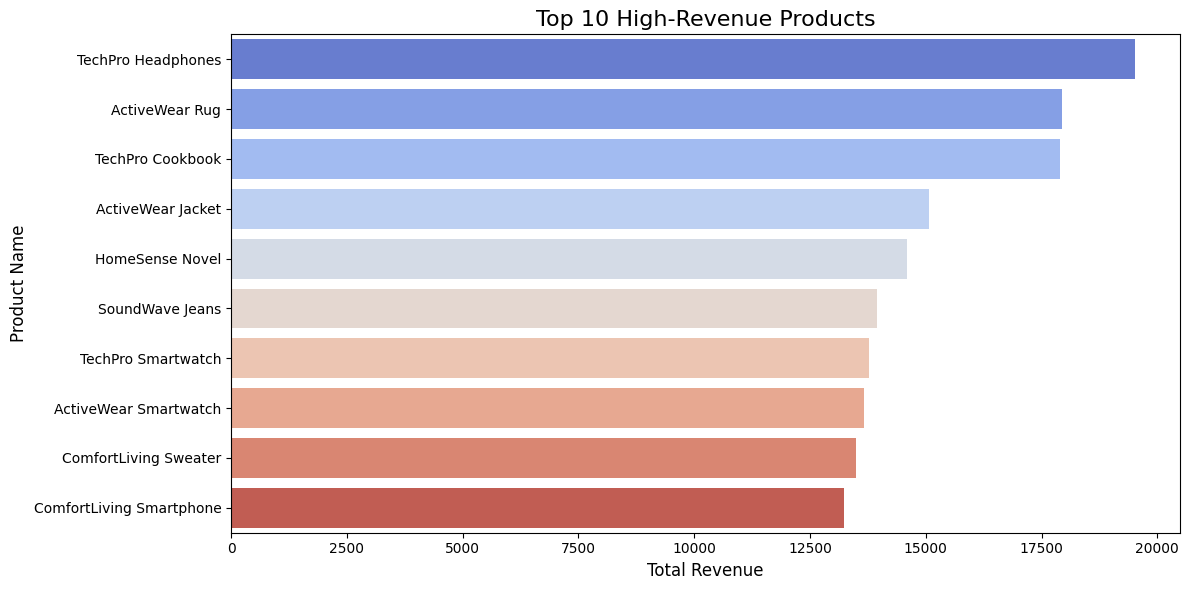

In [105]:
#HIGH REVENUE PRODUCT
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalRevenue', y='ProductName', data=top_products, palette='coolwarm')
plt.title('Top 10 High-Revenue Products', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()